In [62]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime
sns.set()
plt.style.use('seaborn')
pd.options.plotting.backend = "plotly"
plt.rcParams["figure.figsize"] = (16, 8)
sns.set_palette("bright")

In [109]:
#df = pd.read_csv('../../corpus/forums/drugsforumNL/threads/drugsforumnl.csv')
df = pd.read_csv('../../corpus/forums/drugsforumInfo/threads/drugsforuminfo_threads.csv')
df['title'] = df['title'].str.lower()
df['content'] = df['content'].str.lower()

In [38]:
def fill_missing_months(drug_df):
    beg_year, end_year = 2008, 2022
    beg_month, end_month = 1, 12
    for year in range(beg_year, end_year+1):
        for month in range(beg_month, end_month+1):
            if month<10:
                month_str = '0'+str(month)
            else:
                month_str = str(month)
            month_year = str(year) + '-' + month_str
            if month_year in drug_df['month-year'].unique():
                #print(month_year)
                continue
            new_row = pd.DataFrame({
                'month' : [month_str],
                'year' : [str(year)],
                'month-year' : [month_year],
                'comments' : [0],
                'views' : [0],
                'url' : [''],
                'title' : ['something'],
                'username' : ['something]'],
                'user_url' : [''],
                'thread_id' : [0],
                'forum' : [''],
            }, index = [len(drug_df)])
            drug_df = drug_df.append(new_row)
    return drug_df

In [171]:
def get_drug_stats(drug_names):
    drug_df = pd.DataFrame(columns=df.columns)
#    drug_df = drug_df.replace(np.nan, 'something', regex=True)
    # run loop to search for every drug name
    for drug_name in drug_names:
        t_df = df[df['title'].str.contains(drug_name)]
        c_df = df[df['content'].str.contains(drug_name, na=False)]
        tc_df = pd.concat([t_df,c_df]).drop_duplicates().reset_index(drop=True)
        drug_df = pd.concat([drug_df, tc_df]).drop_duplicates().reset_index(drop=True)
    
    drug_df['month'] = drug_df['date'].apply(lambda x: int(x.split('-')[1]))
    drug_df['year'] = drug_df['date'].apply(lambda x: int(x.split('-')[0]))
    drug_df['month-year'] = drug_df['date'].apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])
    # print out information
    print('DRUG : ', '/'.join(drug_names))
    print('total occurences : ', drug_df.shape[0])
    print('total views :', drug_df['views'].sum())
    print('total comments :', drug_df['comments'].sum())
    
#     for i in drug_df.index:
#         print(i)
    drug_df = fill_missing_months(drug_df)
    
    data=drug_df.sort_values(by=['month-year'], ascending=True)
    data['month-year'] = data['month-year'].apply(lambda x: datetime.strptime(x, "%Y-%m"))
#    data['freq'] = data.groupby('month-year')['month-year'].transform('count')
    data['freq'] = data['views'].map(lambda x: 0 if x == 0 else 1)
    
    sns.lineplot(x=data['month-year'],
                y = pd.to_numeric(data['comments']),
                estimator=sum,
                ci=None,
                color='b',
                label='comments'
                )
    ax2 = plt.twinx()
    ax2.grid(False)
#    ax2.legend(loc=5)
    sns.lineplot(x=data['month-year'],
                y = pd.to_numeric(data['views']),
                estimator=sum,
                ci=None,
                ax = ax2,
                color='orange',
                label='\nviews'
                )
    plt.xticks(rotation='vertical')
    plt.locator_params(axis='x', nbins=20)
    
    plt.title('views of posts related to ' + '/'.join(drug_names))

In [182]:
def get_drug_timeseries(drug_names, df):
    drug_df = pd.DataFrame(columns=df.columns)
    df = df[df['date']!='something']
    # run loop to search for every drug name
    for drug_name in drug_names:
        t_df = df[df['title'].str.contains(drug_name)]
        c_df = df[df['content'].str.contains(drug_name, na=False)]
        tc_df = pd.concat([t_df,c_df]).drop_duplicates().reset_index(drop=True)
        drug_df = pd.concat([drug_df, tc_df]).drop_duplicates().reset_index(drop=True)
    
    drug_df['month'] = drug_df['date'].apply(lambda x: int(x.split('-')[1]))
    drug_df['year'] = drug_df['date'].apply(lambda x: int(x.split('-')[0]))
    drug_df['month-year'] = drug_df['date'].apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])
    # print out information
#     print('DRUG : ', '/'.join(drug_names))
#     print('total occurences : ', drug_df.shape[0])
#     print('total views :', drug_df['views'].sum())
#     print('total comments :', drug_df['comments'].sum())
    
    drug_df = fill_missing_months(drug_df)
    
    data=drug_df.sort_values(by=['month-year'], ascending=True)
    data['month-year'] = data['month-year'].apply(lambda x: datetime.strptime(x, "%Y-%m"))
    data['freq'] = data['views'].map(lambda x: 0 if x == 0 else 1)
    return data

In [190]:
def plot_two_sources(data1, data2):
    metric = 'comments'
    sns.lineplot(x=data1['month-year'],
            y = pd.to_numeric(data1[metric]),
            estimator=sum,
            ci=None,
            color='b',
            label='source1'
            )
#     ax2 = plt.twinx()
#     ax2.grid(False)
    sns.lineplot(x=data2['month-year'],
                y = pd.to_numeric(data2[metric]),
                estimator=sum,
                ci=None,
#                ax = ax2,
                color='orange',
                label='source2'
                )
    plt.xticks(rotation='vertical')
    plt.locator_params(axis='x', nbins=20)
    
    plt.title('views of posts related to ' + '/'.join(drug_names))

/home/anshita/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>



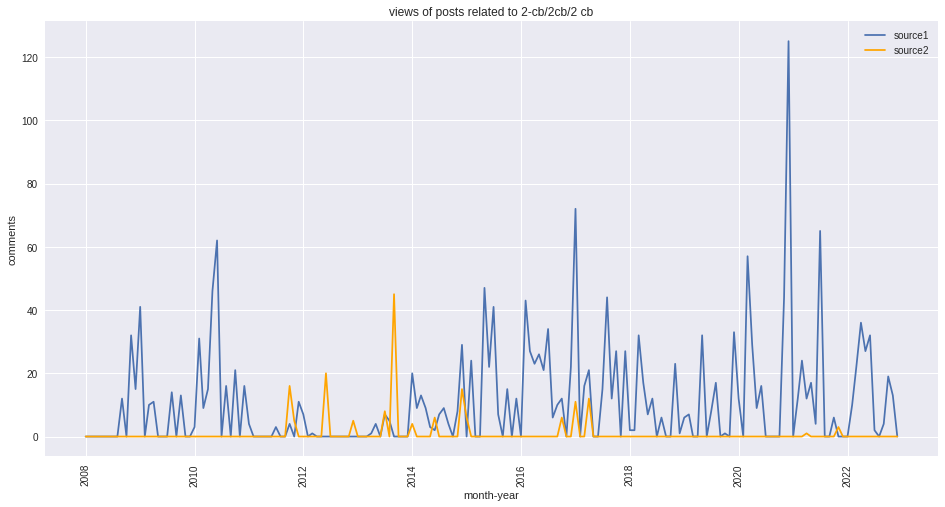

In [191]:
nl_df = pd.read_csv('../../corpus/forums/drugsforumNL/threads/drugsforumnl.csv')
info_df = pd.read_csv('../../corpus/forums/drugsforumInfo/threads/drugsforuminfo_threads.csv')
#drug_names=['3mmc', '3-mmc', '3 mmc']
drug_names = ['2-cb','2cb','2 cb']
nl_data = get_drug_timeseries(drug_names, nl_df)
info_data = get_drug_timeseries(drug_names, info_df)
plot_two_sources(nl_data, info_data)

In [181]:
#info_data[info_data['title']!='something']
#pd.to_numeric(info_data['freq'])
info_data

,thread_id,forum,title,content,views,comments,url,username,user_id,user_url,date,month,year,month-year,freq
14,3406,drugsforum-info,4-fa/4-fmp status,in hoeverre is 4-fa/4-fmp al verbannen van de ...,3314,16,http://drugsforum.info/research-chemicals/4-fa...,Davinci,0,http://drugsforum.info/member/Davinci/,2011-10-19,10,2011,2011-10-01,1
15,3519,drugsforum-info,SSRI (paroxetine 20mg) + 2CB + Ketamine,Ik neem elke avond 1 20mg paroxetine pil en ik...,1088,5,http://drugsforum.info/research-chemicals/ssri...,Special K,0,http://drugsforum.info/member/Special%20K/,2011-11-08,11,2011,2011-11-01,1
13,5070,drugsforum-info,Wat zijn interessante RC's?,Ik heb dit vraag ook al op een ander forum ges...,1092,20,http://drugsforum.info/research-chemicals/wat-...,psychedelicious,0,http://drugsforum.info/member/psychedelicious/,2012-06-12,6,2012,2012-06-01,1
10,6256,drugsforum-info,2cb icm speed,Iemand ervaring met deze combi? En in hoeverre...,4024,5,http://drugsforum.info/research-chemicals/2cb-...,Koekert,0,http://drugsforum.info/member/Koekert/,2012-12-20,12,2012,2012-12-01,1
9,7336,drugsforum-info,2cb voor het eerst film kijken ?,"Hey, Ik ga deze week voor het eerst 2cb gebrui...",1415,8,http://drugsforum.info/research-chemicals/2cb-...,Hollondia head,0,http://drugsforum.info/member/Hollondia%20head/,2013-07-01,7,2013,2013-07-01,1
7,7697,drugsforum-info,Grootste dosis 2cb ooit genomen?,"Mijne ligt rond de 40 - 50 mg,was erg heftig, ...",2313,45,http://drugsforum.info/research-chemicals/groo...,I Riddim,0,http://drugsforum.info/member/I%20Riddim/,2013-09-13,9,2013,2013-09-01,1
0,8523,drugsforum-info,4FA Tips?,"Beste DF People .Ik ben een jochie van 25 , ...",999,4,http://drugsforum.info/research-chemicals/4fa-...,Pityness,0,http://drugsforum.info/member/Pityness/,2014-01-25,1,2014,2014-01-01,1
8,9672,drugsforum-info,2cb en Lorazepam,Tripmiddelen als paddo's en LSA-zaden vallen b...,661,6,http://drugsforum.info/research-chemicals/2cb-...,Maus,0,http://drugsforum.info/member/Maus/,2014-06-28,6,2014,2014-06-01,1
12,10632,drugsforum-info,beste rc of combo van rcs voor festival,hey ik heb verschillende rcs liggen en ga zate...,1498,15,http://drugsforum.info/research-chemicals/best...,karl201,0,http://drugsforum.info/member/karl201/,2014-12-14,12,2014,2014-12-01,1
5,10746,drugsforum-info,Vloeibare 2cb,"Goedenavond drugsforum,sinds kort ken ik ieman...",617,3,http://drugsforum.info/research-chemicals/vloe...,kaasje,0,http://drugsforum.info/member/kaasje/,2015-01-05,1,2015,2015-01-01,1


DRUG :  3mmc/3-mmc/3 mmc
total occurences :  29
total views : 137116
total comments : 802


/home/anshita/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>



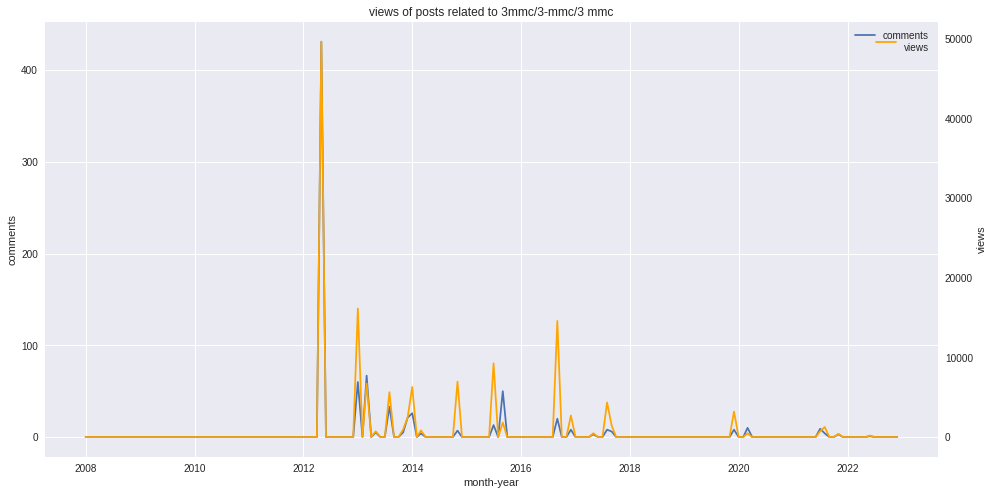

In [143]:
#drug_names = ['cocaine']
drug_names=['3mmc', '3-mmc', '3 mmc']
#drug_names = ['2-cb','2cb','2 cb']
#drug_names = ['4-fa', '4 fa','4fa','4-fmp','4 fmp','4fmp']
#drug_names = ['phenibut']
get_drug_stats(drug_names)

In [119]:
df['content']

0      deze post is tegen spam kankerzooi oprottten h...
1      een leuk voordeel vind ik vaak aan bepaalde su...
2      iemand al ervaring met deze stof? ik ben van p...
3      staat deze hier al?kan je kopen blijkbaar.zag ...
4      ik heb net 4 biertjes gedronken, is het dan ve...
                             ...                        
552    schijnbaar een extreem specifieke nmda-recepto...
553                                            something
554                                            something
555                                            something
556                                            something
Name: content, Length: 557, dtype: object